<a href="https://colab.research.google.com/github/rasho330/DATA270-GWAR/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/My Drive/GWAR/Model_Building")
!ls

after_tokenization.ipynb  cleaned_ats_val.csv	test.csv
ATS_cleaning_s.ipynb	  cleaned.csv		train.csv
cleaned_ats_test.csv	  combined.csv		validation.csv
cleaned_ats_train.csv	  Model_Building.ipynb


In [ ]:
#pip install keras_preprocessing

Importing Libraries

In [ ]:
import numpy as np  
import pandas as pd 
import re           
from bs4 import BeautifulSoup 
from keras.preprocessing.text import Tokenizer 
from keras_preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import sys

In [ ]:
data=pd.read_csv("cleaned.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308828 entries, 0 to 308827
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   article     308828 non-null  object
 1   highlights  308828 non-null  object
dtypes: object(2)
memory usage: 4.7+ MB


In [ ]:
article_length_df = pd.DataFrame({
    'article_length': data['article'].str.split().apply(len)})

In [ ]:
highlights_length_df = pd.DataFrame({
    'highlights_length': data['highlights'].str.split().apply(len)})

In [ ]:
article_length_df

,article_length
0,197
1,526
2,578
3,331
4,739
...,...
308823,360
308824,318
308825,574
308826,269


In [ ]:
highlights_length_df

,highlights_length
0,35
1,51
2,62
3,40
4,22
...,...
308823,26
308824,36
308825,37
308826,28


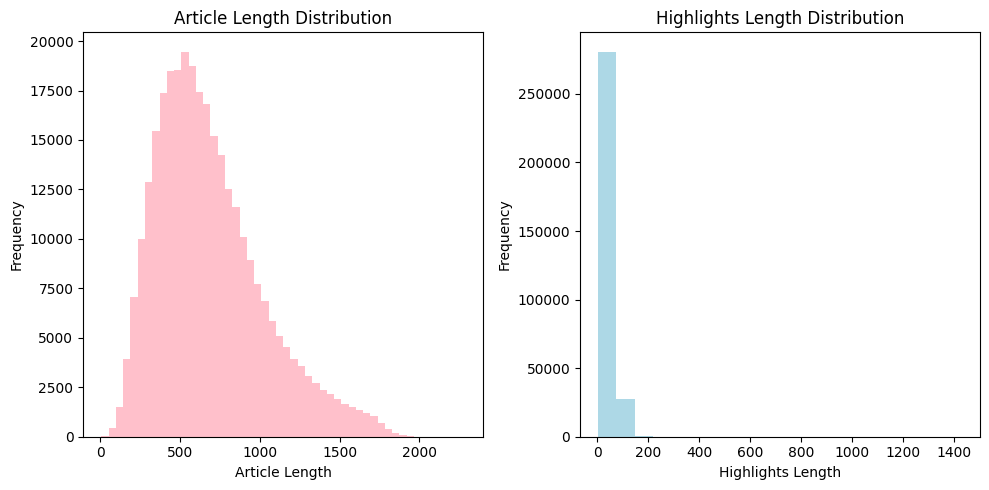

Average article length: 688.0134022821765
Average highlights length: 49.32791068167394


In [ ]:
import matplotlib.pyplot as plt

# Plot article length
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(article_length_df['article_length'], bins=50, color='pink')
axs[0].set_xlabel('Article Length')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Article Length Distribution')

# Plot highlights length
axs[1].hist(highlights_length_df['highlights_length'], bins=20, color='lightblue')
axs[1].set_xlabel('Highlights Length')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Highlights Length Distribution')

plt.tight_layout()
plt.show()

# Calculate average lengths
avg_article_length = article_length_df['article_length'].mean()
avg_highlights_length = highlights_length_df['highlights_length'].mean()

print('Average article length:', avg_article_length)
print('Average highlights length:', avg_highlights_length)

In [ ]:
cnt=0
for i in data['highlights']:
    if(len(i.split())<=200):
        cnt=cnt+1
print(cnt/len(data['highlights']))

0.9994689600683876


In [ ]:
cnt=0
for i in data['article']:
    if(len(i.split())<=1800):
        cnt=cnt+1
print(cnt/len(data['article']))

0.9982482158353517


In [ ]:
max_article_len= 1800
max_highlights_len= 200

In [ ]:
cleaned_article = np.array(data['article'])
cleaned_highlights = np.array(data['highlights'])

shortened_article=[]
shortened_highlights=[]

for i in range(len(cleaned_article)):
    if(len(cleaned_highlights[i].split())<=max_highlights_len and len(cleaned_article[i].split())<=max_article_len):
        shortened_article.append(cleaned_article[i])
        shortened_highlights.append(cleaned_highlights[i])
        
cleaned_shortened_df=pd.DataFrame({'article':shortened_article,'highlights':shortened_highlights})

In [ ]:
#cleaned_shortened_df['article'].shape

(308125,)

In [ ]:
#cleaned_shortened_df['highlights'].shape

(308125,)

In [ ]:
cleaned_shortened_df['highlights'] = cleaned_shortened_df['highlights'].apply(lambda x : 'sostok '+ x + ' eostok')

In [ ]:
#cleaned_shortened_df['highlights'].shape

(308125,)

In [ ]:
cleaned_shortened_df.head()

,article,highlights
0,"by . associated press . published . 1411 est, 25 october 2013 . . updated . 1536 est, 25 october 2013 . the bishop of the fargo catholic diocese in north dakota has exposed potentially hundreds of...","sostok bishop john folda, of north dakota, is taking time off after being diagnosed. he contracted the infection through contaminated food in italy. church members in fargo, grand forks and jamest..."
1,"(cnn) with a breezy sweep of his pen president vladimir putin wrote a new chapter into crimeas turbulent history, committing the region to a future returned to russian domain. sixty years prior, u...","sostok nina dos santos says europe must be ready to accept sanctions will hurt both sides. targeting russias business community would be one way of sapping their support for president putin, she s..."
2,fleetwood are the only team still to have a 100 record in sky bet league one as a 20 win over scunthorpe sent graham alexander’s men top of the table. the cod army are playing in the third tier fo...,"sostok fleetwood top of league one after 20 win at scunthorpe. peterborough, bristol city, chesterfield and crawley all drop first points of the season. standin striker matt done scores a hattrick..."
3,hes been accused of making many a fashion faux pas while on holiday. but the prime minister seems to be deaf to his critics. yesterday david cameron was seen in the same pair of beige loafers he w...,sostok prime minister and his family are enjoying an easter break in lanzarote. sported the same 20.99 beige loafers as he wore in portugal last year. pm sat and had a drink at a beachside cafe on...
4,"by . daily mail reporter . published . 0115 est, 30 november 2013 . . updated . 0123 est, 30 november 2013 . more than two decades after magic johnson announced that he had hiv, the basketball pla...",sostok nba star calls for black and hispanic communities to get tested. former lakers player dedicated life to raising awareness about disease . eostok


Splitting the data 

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(cleaned_shortened_df['article']),np.array(cleaned_shortened_df['highlights']),test_size=0.1,random_state=0,shuffle=True) 

Tokenizer for Article

In [ ]:
from keras.preprocessing.text import Tokenizer 
from keras_preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [ ]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 64.729588543547
Total Coverage of rare words: 0.3628416630322528


In [ ]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_article_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_article_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

In [ ]:
x_voc

257918

Tokenizer for Highlights

In [ ]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [ ]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 73.60580461986049
Total Coverage of rare words: 1.8026575834999934


In [ ]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_highlights_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_highlights_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1

In [ ]:
y_tokenizer.word_counts['sostok'],len(y_tr)   

(277312, 277312)

In [ ]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [ ]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [ ]:
x_tr

array([[   14,    51,  1620, ...,     0,     0,     0],
       [  138,   317,    44, ...,     0,     0,     0],
       [   19,  8189, 50129, ...,     0,     0,     0],
       ...,
       [  126,    30,  5734, ...,     0,     0,     0],
       [  126,    12,     7, ...,     0,     0,     0],
       [    1,  1905,  9452, ...,     0,     0,     0]], dtype=int32)

Encoder - LSTM Layer

In [ ]:
from keras import backend as K
from keras.layers import AdditiveAttention, Concatenate, Input, LSTM, Dense, Embedding
from keras.models import Model

K.clear_session()

latent_dim = 300
embedding_dim=100

# Encoder
encoder_inputs = Input(shape=(max_article_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

Decoder

In [ ]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

Attention Layer

In [ ]:
# Attention layer using AdditiveAttention
attention = AdditiveAttention()([decoder_outputs, encoder_outputs])


# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attention])

Dense Layer

In [ ]:
#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1800)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1800, 100)    25791800    ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 1800, 300),  481200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

Model Summary

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [ ]:
history=model.fit([x_tr[:50],y_tr[:50,:-1]], y_tr[:50,1:] ,epochs=1,callbacks=[es],batch_size=2, validation_data=([x_val[:5],y_val[:5,:-1]], y_val[:5,1:]))

25/25 [==============================] - 256s 10s/step - loss: 4.5048 - val_loss: 2.4192


In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

Inference to decode integer sequence to word sequence

In [ ]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_article_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attention([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
!pip install rouge
from rouge import Rouge
import numpy as np
def calculate_rouge_scores(reference_summaries, generated_summaries):
    rouge = Rouge()
    scores = rouge.get_scores(generated_summaries, reference_summaries, avg=True)
    return scores
def calculate_accuracy(reference_summaries, generated_summaries, threshold=0.5):
    num_correct = 0
    total = len(reference_summaries)
    for ref, gen in zip(reference_summaries, generated_summaries):
        similarity = rouge.get_scores([gen], [ref])[0]['rouge-l']['f']
        if similarity >= threshold:
            num_correct += 1
    accuracy = num_correct / total
    return accuracy